In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [305]:
data = load_iris()

In [306]:
df = pd.DataFrame(data.data)

In [307]:
df.columns = data.feature_names

In [308]:
df['Target'] = data.target

In [309]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [310]:
# scaler = MinMaxScaler()
# df[['petal length (cm)', 'petal width (cm)']] = scaler.fit_transform(df[['petal length (cm)', 'petal width (cm)']])

<font size="5">**We are going to see how they are scattered by sepal and petal length and width**</font>

In [311]:
df1 = df[df['Target'] == 0]
df2 = df[df['Target'] == 1]
df3 = df[df['Target'] == 2]

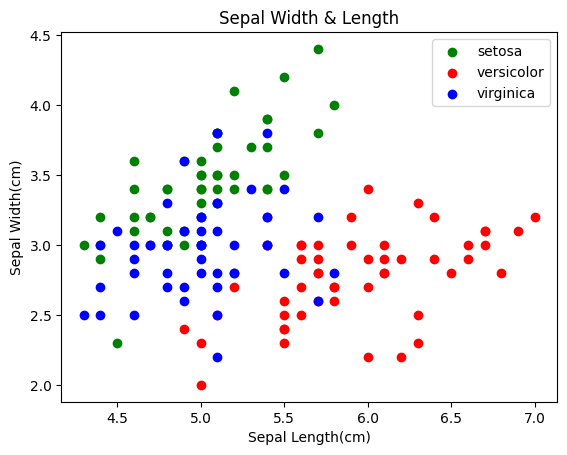

In [312]:
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='green')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red')
plt.scatter(df1['sepal length (cm)'], df3['sepal width (cm)'], color='blue')
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Sepal Width(cm)')
plt.title('Sepal Width & Length')
plt.legend(data.target_names)

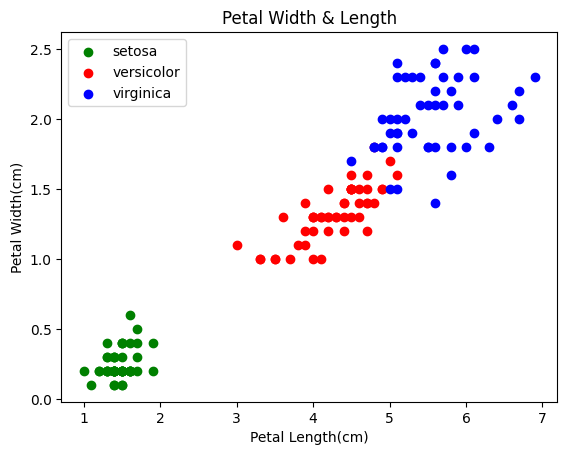

In [313]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='red')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='blue')
plt.xlabel('Petal Length(cm)')
plt.ylabel('Petal Width(cm)')
plt.title('Petal Width & Length')
plt.legend(data.target_names)

<font size="5">**We can observe that it is easy to cluster them by Petal features**</font>

In [314]:
x_train, x_test, y_train, y_test = train_test_split(df[['petal length (cm)', 'petal width (cm)']], df['Target'], train_size=0.8)

In [315]:
k_list = range(1, 12)
sse = []
for k in k_list:
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(x_train, y_train)
    sse.append(km.inertia_)

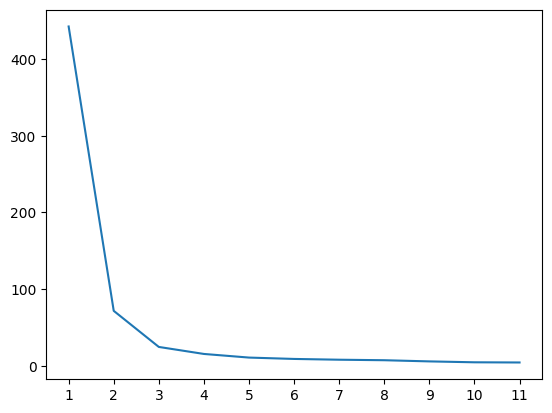

In [316]:
plt.plot(k_list, sse)
plt.xticks(k_list)
plt.show()

<font size="5">**Based on the 'Elbow Technique' we can say that k = 3 is the best fit for our model**</font>

In [317]:
km = KMeans(n_clusters=3, n_init='auto')
predict = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])

In [318]:
df['Predict'] = predict

In [319]:
plot_df = df[['petal length (cm)', 'petal width (cm)', 'Predict']]

In [320]:
df1 = plot_df[plot_df['Predict'] == 0]
df2 = plot_df[plot_df['Predict'] == 1]
df3 = plot_df[plot_df['Predict'] == 2]

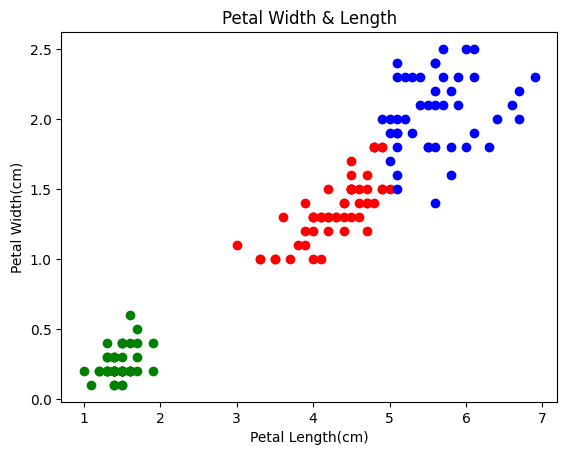

In [321]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='red')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='blue')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='green')
plt.xlabel('Petal Length(cm)')
plt.ylabel('Petal Width(cm)')
plt.title('Petal Width & Length')
plt.show()

<font size="3">**It predicted right :)**</font>